In [1]:
import pandas as pd
import itertools
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

folder_path = '../assets/Assignment_Data_2023-2024/Assignment_Data_2023-2024/'

club_games_df = pd.read_csv(folder_path+'club_games.csv')
clubs_df = pd.read_csv(folder_path+'clubs.csv')
competition_df = pd.read_csv(folder_path+'competitions.csv')

<Figure size 1500x800 with 0 Axes>

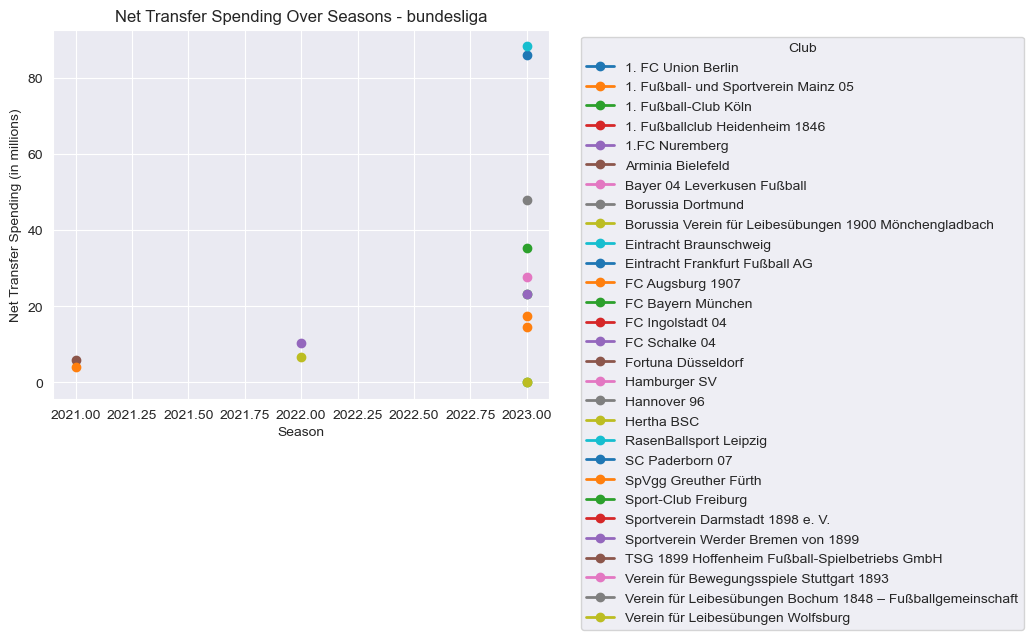

<Figure size 1500x800 with 0 Axes>

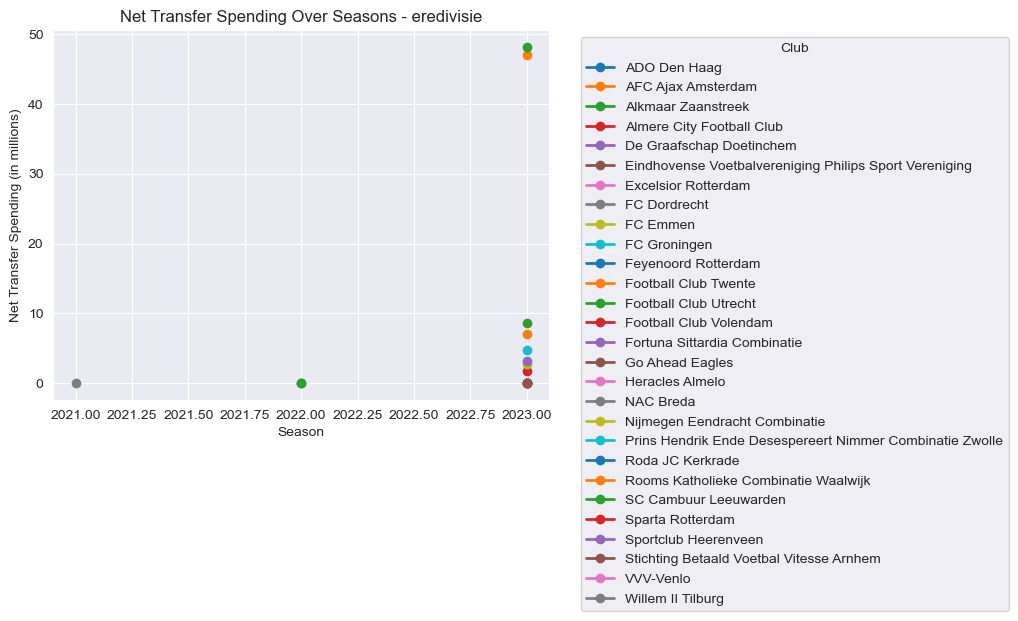

<Figure size 1500x800 with 0 Axes>

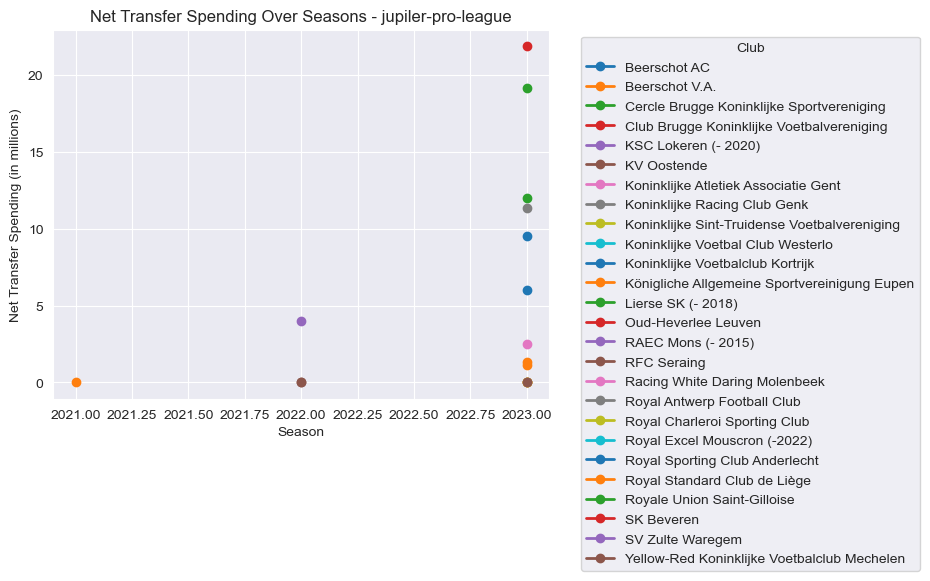

<Figure size 1500x800 with 0 Axes>

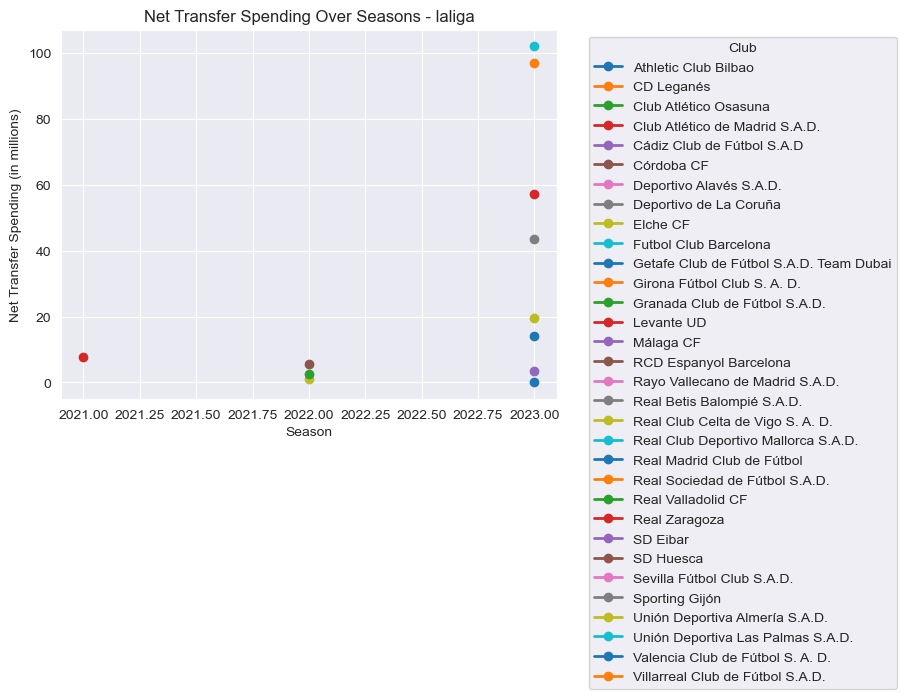

<Figure size 1500x800 with 0 Axes>

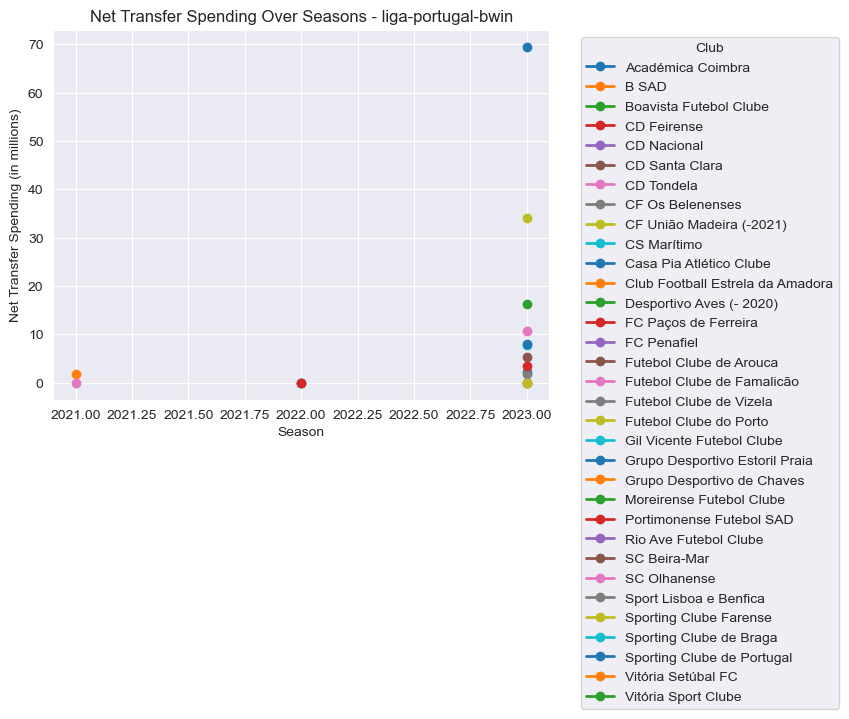

<Figure size 1500x800 with 0 Axes>

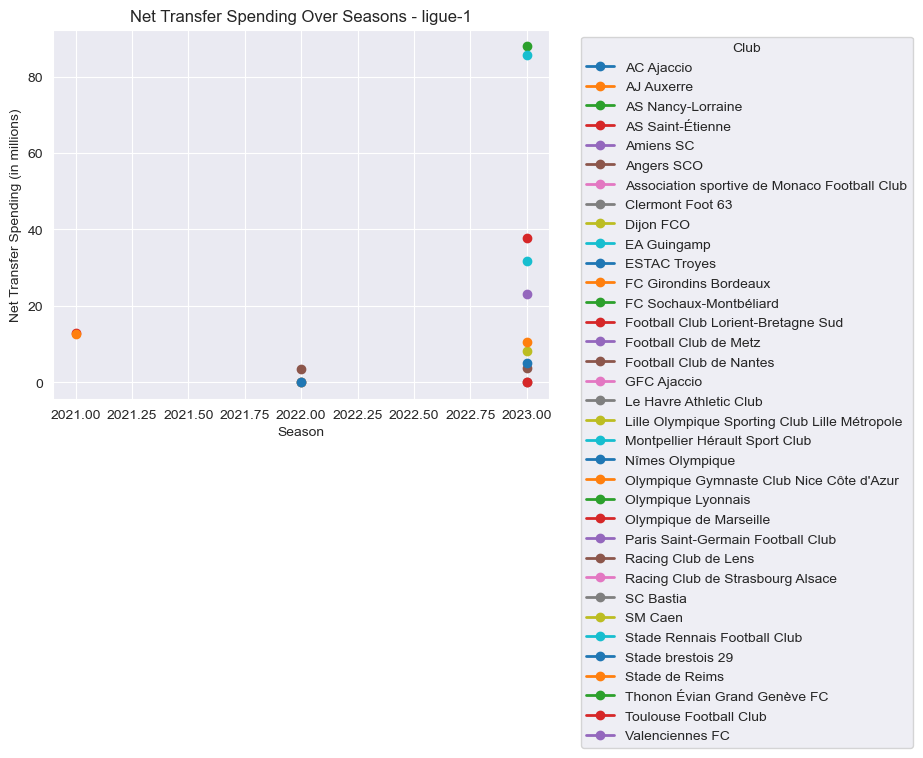

<Figure size 1500x800 with 0 Axes>

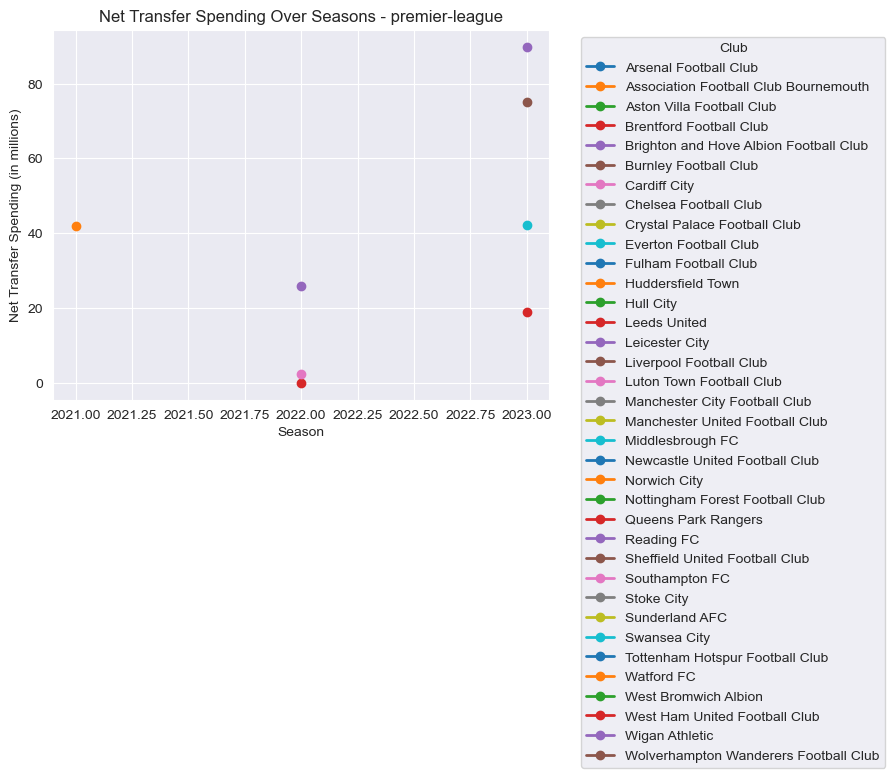

<Figure size 1500x800 with 0 Axes>

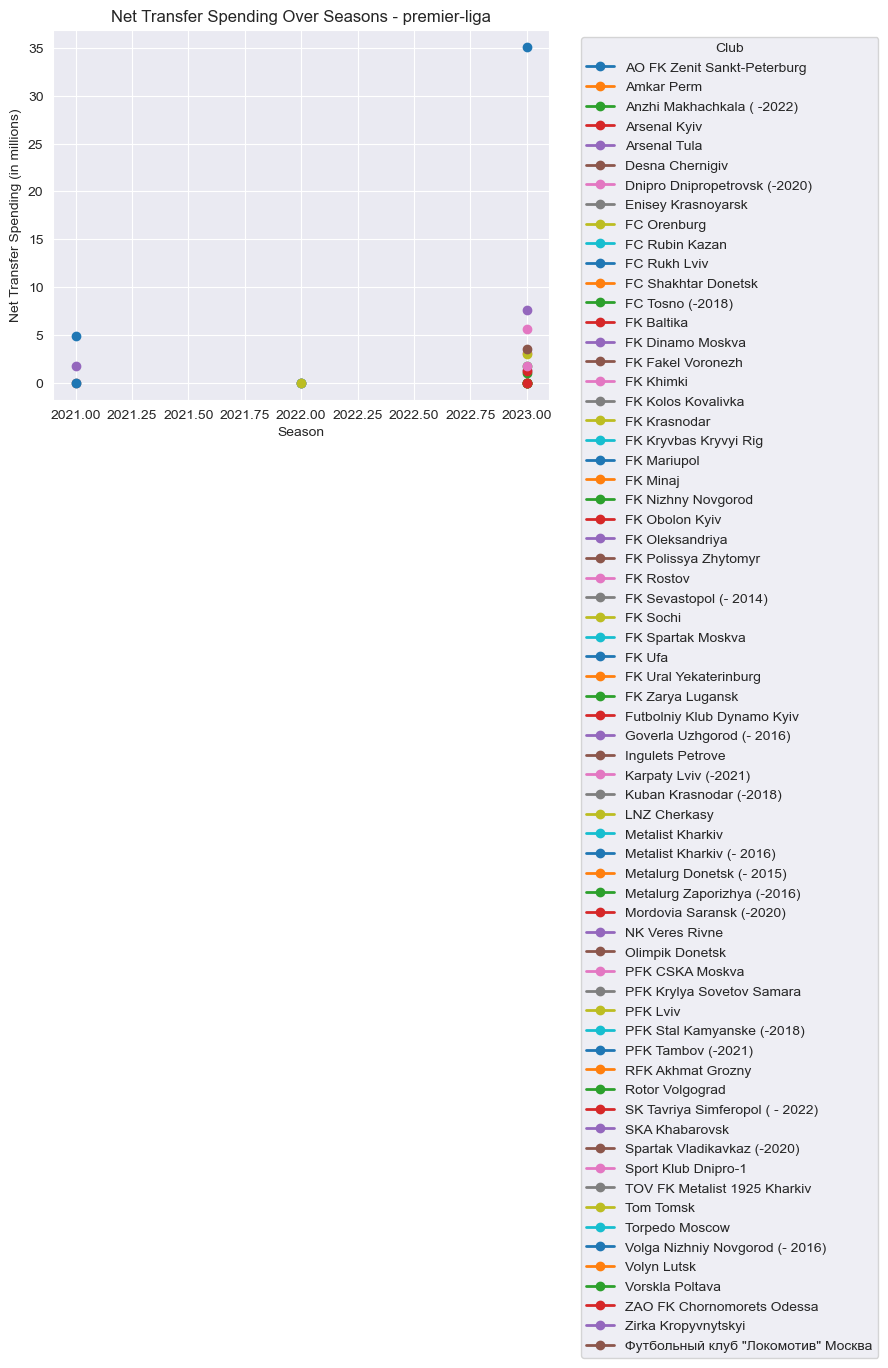

<Figure size 1500x800 with 0 Axes>

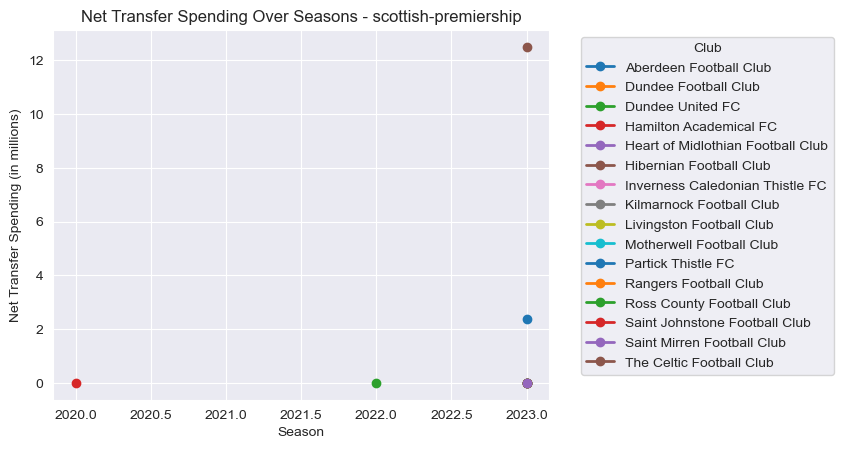

<Figure size 1500x800 with 0 Axes>

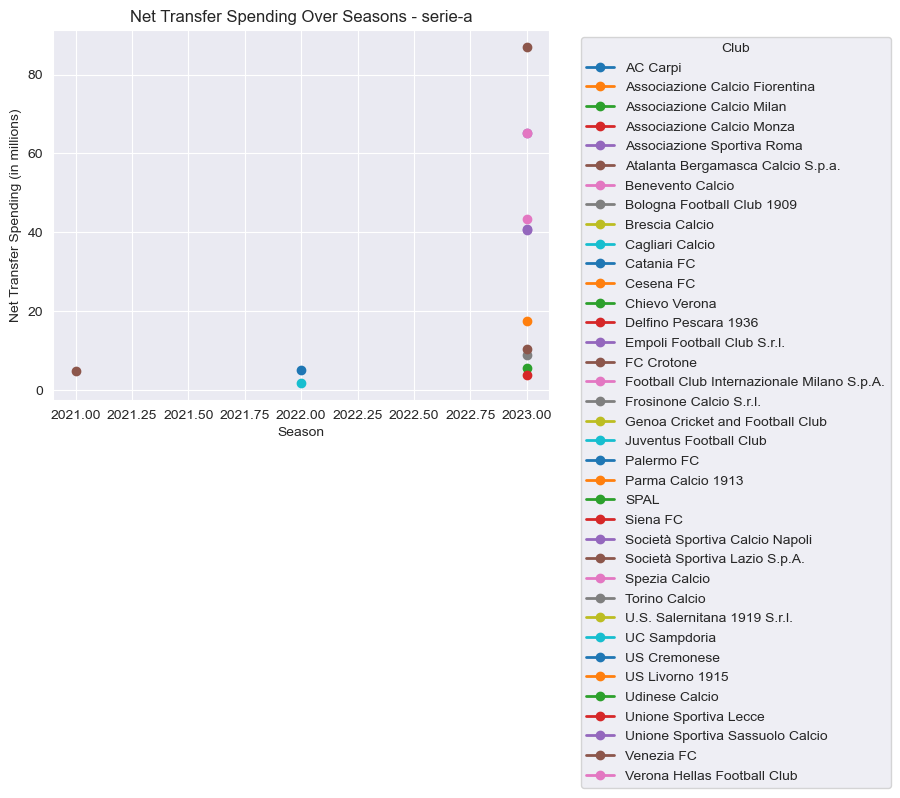

<Figure size 1500x800 with 0 Axes>

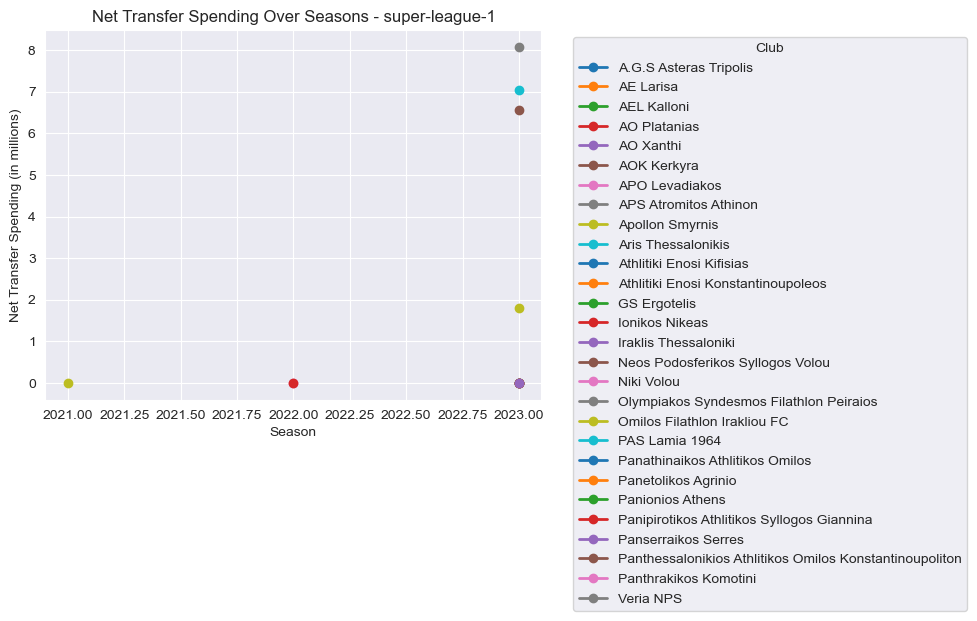

<Figure size 1500x800 with 0 Axes>

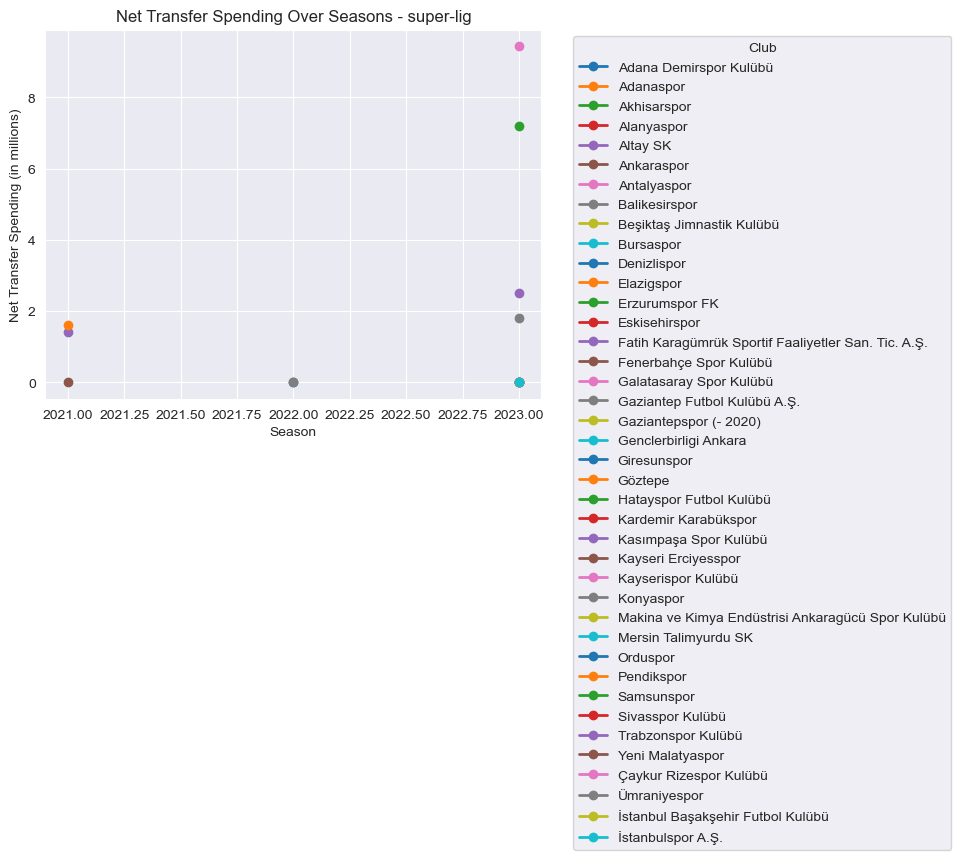

<Figure size 1500x800 with 0 Axes>

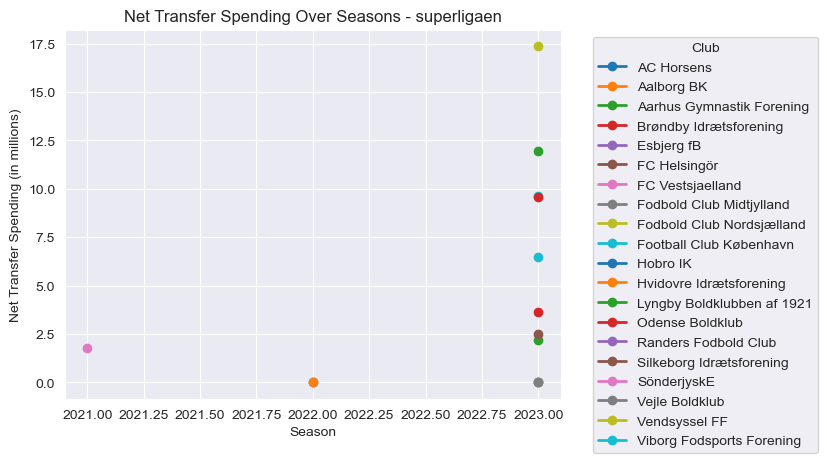

""


In [2]:
'''
in dataset to abbreviate millions there is m near the number, we have to clean that in order to make the conversion
to a number 
also excluding negative values 
'''

# Clean the 'net_transfer_record' column and convert to numeric
clubs_df['net_transfer_record'] = clubs_df['net_transfer_record'].replace(r'[\$,€m]', '', regex=True)
clubs_df['net_transfer_record'] = pd.to_numeric(clubs_df['net_transfer_record'], errors='coerce')

# Merge the dataframes on competition ID
merged_df = pd.merge(clubs_df, competition_df[['competition_id', 'competition_code']], left_on='domestic_competition_id', right_on='competition_id')

# Group by competition code, club name, and last season, and sum the net transfer records
club_transfer_analysis = merged_df.groupby(['competition_code', 'name', 'last_season'])['net_transfer_record'].sum().reset_index()

# Function to process each group and plot the data
def process_and_plot(group):
    pivot_table = group.pivot(index='last_season', columns='name', values='net_transfer_record')
    
    # Select last 3 seasons, handle cases with fewer than 3 seasons
    if len(pivot_table.index) > 2:
        last_3_years = pivot_table.index[-3:]
    else:
        last_3_years = pivot_table.index

    pivot_table = pivot_table.loc[last_3_years]

    # Replace negative values with NaN
    pivot_table = pivot_table.map(lambda x: x if x >= 0 else np.nan)
    
    # Plotting
    plt.figure(figsize=(15, 8))
    pivot_table.plot(kind='line', marker='o', linewidth=2)
    plt.title(f'Net Transfer Spending Over Seasons - {group.name}')
    plt.xlabel('Season')
    plt.ylabel('Net Transfer Spending (in millions)')
    plt.legend(title='Club', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Apply the function to each group in the groupby object
club_transfer_analysis.groupby('competition_code').apply(process_and_plot)


# Top 30 stadiums with the most seats

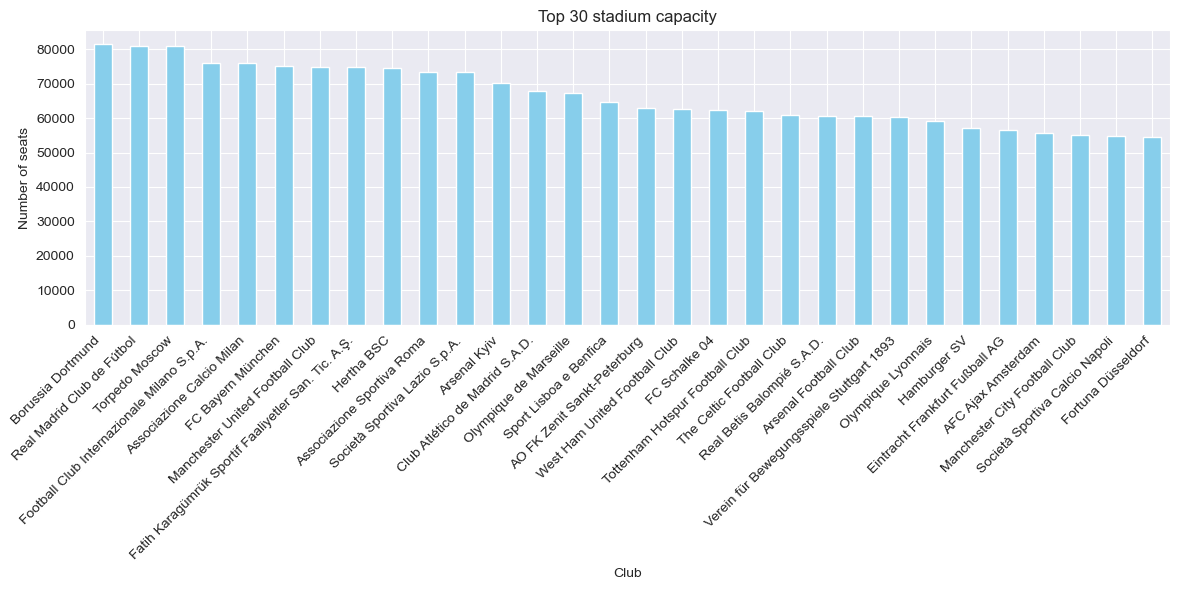

In [3]:
max_seats_per_team = clubs_df.groupby('name')['stadium_seats'].max()

max_seats_per_team = max_seats_per_team.sort_values(ascending=False)


top_stadiums = max_seats_per_team.head(30)

plt.figure(figsize=(12, 6))
top_stadiums.plot(kind='bar', color='skyblue')
plt.title('Top 30 stadium capacity')
plt.xlabel('Club')
plt.ylabel('Number of seats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

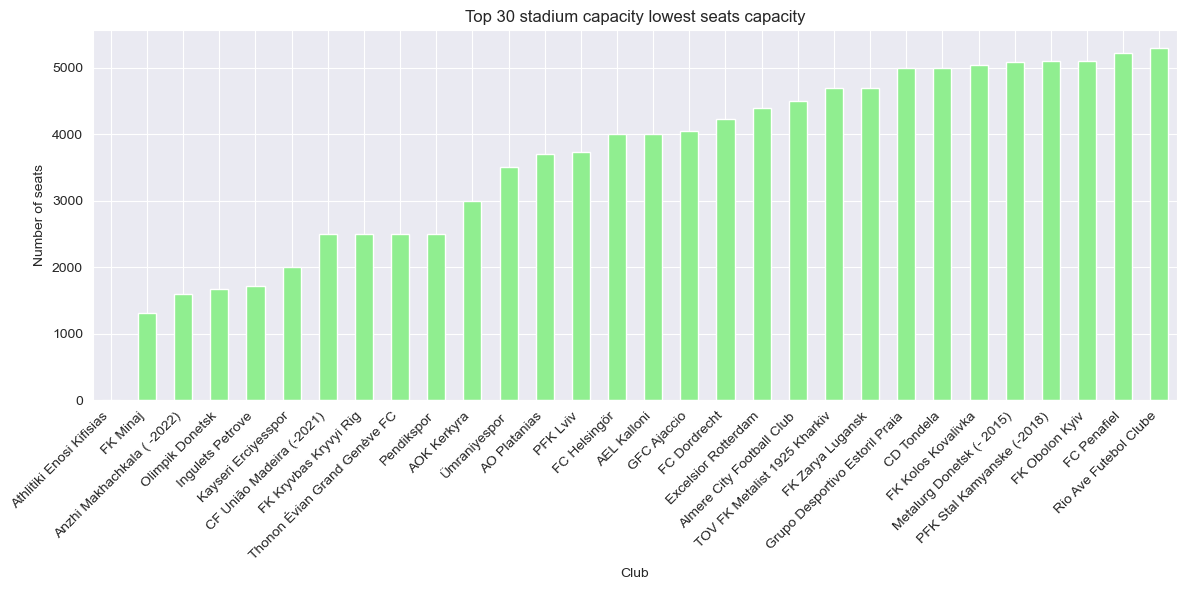

In [4]:
min_seats_per_team = clubs_df.groupby('name')['stadium_seats'].min()

min_seats_per_team = min_seats_per_team.sort_values(ascending=True)

top_stadiums = min_seats_per_team.head(30)

plt.figure(figsize=(12, 6))
top_stadiums.plot(kind='bar', color='lightgreen')
plt.title('Top 30 stadium capacity lowest seats capacity')
plt.xlabel('Club')
plt.ylabel('Number of seats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()